# Андан на экономе: домашнее задание 2


In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Часть 2: чековая

За задание можно получить **50** баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

    В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе».

    К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

* id - номер покупки (чека)
* fielddate - дата покупки
* product - что было куплено


In [3]:
df = pd.read_csv('groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 2.1 Разогреваемся

**а) [10 баллов]** Сколько всего уникальных заказов было сделано?

In [4]:
unique_values_count = df['id'].nunique()
print(unique_values_count)

3898


Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме.


Топ-10 самых популярных товаров
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: product, dtype: int64


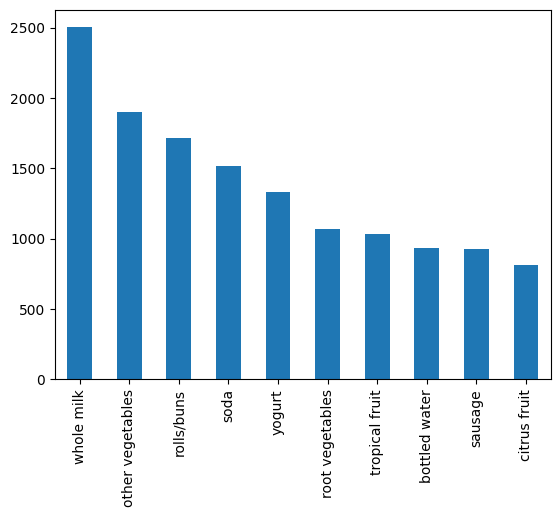

In [6]:
top_10 = df['product'].value_counts().head(10)
top_10.plot.bar()
print(f'Топ-10 самых популярных товаров\n{top_10}')

Визуализируйте как часто покупались товары с помощью облака слов. Для графика используйте все товары из датасета.

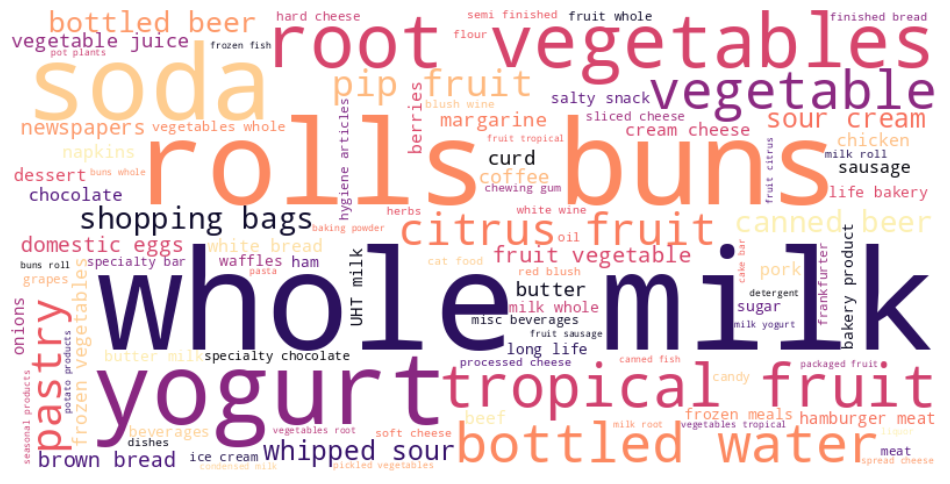

In [7]:
from wordcloud import WordCloud

text = ' '.join(df['product'])

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='magma').generate(text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**б) [10 баллов]** Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет.

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`

In [8]:
table = pd.pivot_table(df, values='product', index='id', columns='product', aggfunc=len, fill_value=0)
table.head()

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0




В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/). У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в pandas.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.


<Axes: xlabel='product', ylabel='product'>

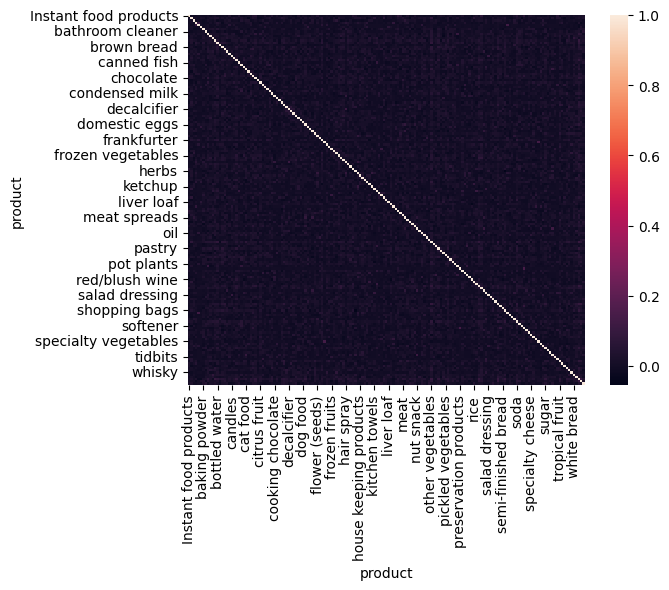

In [9]:
corr = table.corr()
sns.heatmap(corr)


Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой?

In [11]:
egg_corr = corr['domestic eggs'].sort_values(ascending=False)
print(f'Чаще всего коррелируют с яйцами{egg_corr.head(5)}')
print(f'Отрицательно коррелируют с их покупкой яиц{egg_corr.tail(5)}')

Чаще всего коррелируют с яйцамиproduct
domestic eggs      1.000000
meat spreads       0.083607
whole milk         0.072512
newspapers         0.064502
rubbing alcohol    0.060533
Name: domestic eggs, dtype: float64
Отрицательно коррелируют с их покупкой яицproduct
cream               -0.020814
dessert             -0.021004
ready soups         -0.023280
cooking chocolate   -0.023280
pet care            -0.024206
Name: domestic eggs, dtype: float64




Какие два продукта коррелируют сильнее всего?


In [14]:
corr.abs()
max_corr = corr.unstack().sort_values(ascending=False).drop_duplicates()
max_corr.head(2)

product                product              
Instant food products  Instant food products    1.000000
soups                  preservation products    0.143465
dtype: float64



Вопрос: почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

Ответ: корреляция Пирсона измеряет линейную связь между двумя переменными. В контексте анализа покупок, она может указывать на наличие связи между покупками разных товаров, но не учитывает возможность нелинейных зависимостей. То есть, если два продукта покупаются вместе, это может быть не из-за линейной связи между ними, а потому что они, например, продаются на одном отделе магазина.

Кроме того, корреляция Пирсона может быть низкой или нулевой даже в случае сильной связи между покупками, если связь не является линейной. Например, два продукта могут покупаться вместе только в определенных промежутках времени (например, чай и кофе покупаются больше зимой), но между количеством продаж этих продуктов нет линейной зависимости


# 2.2 Коэффициент корреляции Мэтьюса

**Коэффициент корреляции Мэтьюса** — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

**в) [10 баллов]**

  1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
  2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что >= 10)
  3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте combinations из модуля `itertools`.
  4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef.`
  5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` 

Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.



In [16]:
cross_tab = table.applymap(lambda x: 1 if x > 0 else 0)
df_corr = cross_tab.loc[:, cross_tab.sum() >= 10]
df_corr.head()

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [18]:
from itertools import combinations
from sklearn.metrics import matthews_corrcoef

combs = list(combinations(df_corr.columns, 2))

# Считаем коэффициент корреляции Мэтьюса для каждой пары товаров
corr_dict = {}
for comb in combs:
    corr_coef = matthews_corrcoef(df_corr[comb[0]], df_corr[comb[1]])
    corr_dict[comb] = corr_coef

# Выводим пару товаров с наибольшим коэффициентом корреляции Мэтьюса
max_corr = max(corr_dict, key=corr_dict.get)
print(f'Пара товаров с наибольшим коэффициентом корреляции Мэтьюса{max_corr, corr_dict[max_corr]}')

Пара товаров с наибольшим коэффициентом корреляции Мэтьюса(('nut snack', 'tea'), 0.11757805898574299)


In [20]:
df_d = pd.DataFrame(list(corr_dict.items()), columns=['product_1', 'matth_corr_coeff'])
df_d[['product_1', 'product_2']] = pd.DataFrame(df_d['product_1'].tolist(), index=df_d.index)
df_d = df_d.rename(columns={'matth_corr_coeff': 'matthews_corrcoef'})
df_d= df_d[['product_1', 'product_2', 'matthews_corrcoef']]
df_sorted = df_d.head(100).sort_values(by='matthews_corrcoef', ascending=False)
df_sorted.to_csv('result_matthews.csv', index=False)
df_sorted.head()

,product_1,product_2,matthews_corrcoef
79,Instant food products,margarine,0.051747
50,Instant food products,flower (seeds),0.047598
63,Instant food products,hard cheese,0.044490
25,Instant food products,chocolate,0.043102
24,Instant food products,chicken,0.041339



## 2.3 Независимость событий

Конечно же, корреляция — это не единственный способ искать между покупками ассоциативные правила. Давайе попробуем другой подход.

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара `A` не зависит от покупки товара B. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, `P(AB)`

высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности.

**г) [5 баллов]** Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

    Вам аккуратно нужно сделать три среза по условию >= 1.
    Там, где пара надо делать срез так, чтобы оба товара дали True. 
    Сделать это в одну строку вам поможет метод .all(axis=1). 
    Частоты можно получить методом .mean(), так как python думает,
    что False - это ноль, а True - это единица.




In [21]:
cor1 = table.corr()
freq_items = cor1.apply(pd.Series.value_counts) / len(df)
milk = cor1[cor1['whole milk'] >= 1]
eggs = cor1[cor1['domestic eggs'] >= 1]
milk_and_eggs = cor1[(cor1['whole milk'] >= 1) & (cor1['domestic eggs'] >= 1)]

freq_milk = milk.mean().to_frame()
freq_eggs = eggs.mean().to_frame()
freq_milk_and_eggs = milk_and_eggs.mean().to_frame()

support_AB = freq_milk_and_eggs.all(axis=1).mean()
support_A = freq_milk.all(axis=1).mean()
support_B = freq_eggs.all(axis=1).mean()
lift = support_AB / (support_A * support_B)

print('Значение lift для пары продуктов ("whole milk", "domestic eggs"): ', lift)


Значение lift для пары продуктов ("whole milk", "domestic eggs"):  1.0




**д) [10 баллов]**

  1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
  2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
  3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте combinations из модуля `itertools`.
  4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`.
  5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` 
  
  Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.



In [23]:
lift_list = []
for item_1, item_2 in combinations(df_corr.columns, 2):
    item_1_support = df_corr[item_1].mean()
    item_2_support = df_corr[item_2].mean()
    item_1_and_2_support = cross_tab.loc[:, [item_1, item_2]].all(axis=1).mean()
    lift = item_1_and_2_support / (item_1_support * item_2_support)
    lift_list.append((item_1, item_2, lift))

result_df = pd.DataFrame(lift_list, columns=['product_1', 'product_2', 'lift'])
result_df = result_df.sort_values(by='lift', ascending=False).head(100)
result_df.to_csv('result_lift.csv', index=False)
result_df.head()

,product_1,product_2,lift
6669,flower soil/fertilizer,organic products,24.362500
7995,honey,ready soups,19.989744
9689,nut snack,tea,19.686869
7958,honey,ketchup,18.740385
4715,cooking chocolate,ready soups,17.324444




**е) [5 баллов]** Давайте проинтепретируем результаты.

  * Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.

  * Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились?

  * Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?

Ответы: для оценки логичности выбранных пар продуктов можно рассмотреть сценарии, в которых эти продукты могут покупаться вместе. Например, пара "сахар и мука" может быть логичной, так как их часто используют в выпечке. А пара "пиво и памперсы" может показаться не очень логичной, хотя в некоторых ситуациях их покупают вместе, например, когда родители остаются дома с маленьким ребенком и заказывают доставку пива и памперсов.


In [24]:
matthews = pd.read_csv('result_matthews.csv')
lift = pd.read_csv('result_lift.csv')

top_matthews = matthews.sort_values('matthews_corrcoef', ascending=False).head(10)
bottom_matthews = matthews.sort_values('matthews_corrcoef', ascending=True).head(10)

top_lift = lift.sort_values('lift', ascending=False).head(10)

print(top_lift)

                product_1         product_2       lift
0  flower soil/fertilizer  organic products  24.362500
1                   honey       ready soups  19.989744
2               nut snack               tea  19.686869
3                   honey           ketchup  18.740385
4       cooking chocolate       ready soups  17.324444
5            canned fruit   potato products  16.874459
6           frozen fruits           tidbits  16.107438
7                   honey          prosecco  15.781377
8                   honey         skin care  14.992308
9       cooking chocolate          prosecco  13.677193


Чтобы оценить пересечение выбранных методов, можно объединить таблицы по парам продуктов и отсортировать по общей оценке

In [25]:
top_100 = pd.concat([top_matthews, top_lift]).drop_duplicates().sort_values(['matthews_corrcoef', 'lift'], ascending=[False, False]).head(100)
print(top_100)

                product_1         product_2  matthews_corrcoef       lift
0   Instant food products         margarine           0.051747        NaN
1   Instant food products    flower (seeds)           0.047598        NaN
2   Instant food products       hard cheese           0.044490        NaN
3   Instant food products         chocolate           0.043102        NaN
4   Instant food products           chicken           0.041339        NaN
5   Instant food products       canned fish           0.039777        NaN
6   Instant food products          cake bar           0.036693        NaN
7   Instant food products    condensed milk           0.035073        NaN
8   Instant food products   misc. beverages           0.030597        NaN
9   Instant food products      dish cleaner           0.028844        NaN
0  flower soil/fertilizer  organic products                NaN  24.362500
1                   honey       ready soups                NaN  19.989744
2               nut snack             